<a href="https://colab.research.google.com/github/sukkyun2/big-data-visualization-and-analysis/blob/main/02.Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework for Lecture 4

## Task 1

### Read usedcars.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving usedcars.csv to usedcars.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['usedcars.csv'].decode('utf-8')))

### Show summary using head(),tale(), info() and describe()

In [ ]:
df.head() # 앞 내용을 가져옴

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [ ]:
df.tail() # 뒷 내용을 가져옴

,year,model,price,mileage,color,transmission
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO
149,2000,SE,3800,109259,Red,AUTO


In [ ]:
df.info() # dataframe에 대한 전반적인 정보, 컬럼명, NULL의 개수, 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [ ]:
df.describe() # dataframe에 대한 통계정보, NULL이 아닌 데이터의 수, 평균, 표준편차, 최대, 최소

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


### Change name of columns

In [ ]:
df.columns # 컬럼명 변경 전 이름

Index(['year', 'model', 'price', 'mileage', 'color', 'transmission'], dtype='object')

In [ ]:
df.rename(columns={'price':'price(dollar)'}) # 컬럼명 변경 후 price 컬럼을 price(dollar)으로 변경

,year,model,price,mileage,color,tm
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


### Perform at least three loc and iloc data manipulation

In [ ]:
df.loc[1] # 첫번째 row를 가져옴

,1
year,2011
model,SEL
price,20995
mileage,10926
color,Gray
transmission,AUTO


In [ ]:
df.iloc[1:4, [0, 2]] # 1~3행의 0,2열의 값인 year, price로 표현

,year,price
1,2011,20995
2,2011,19995
3,2011,17809


In [ ]:
df.loc[1:4, ['year', 'price']] # 위와 비슷하지만 1-4행, 열값에 컬럼명

,year,price
1,2011,20995
2,2011,19995
3,2011,17809
4,2012,17500


### Perform at least three conditional data manipulation

In [ ]:
df[df['price'] > 10000]

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
116,2009,SE,10955,40180,Gold,AUTO
117,2008,SE,10836,40330,Green,MANUAL
118,2007,SES,10815,77231,Red,AUTO
119,2007,SE,10770,72937,Silver,MANUAL


In [ ]:
df[df['year'] < 2001]

,year,model,price,mileage,color,transmission
142,2000,SE,6980,60161,Green,AUTO
147,2000,SE,5980,96841,Red,AUTO
149,2000,SE,3800,109259,Red,AUTO


In [ ]:
df[df['color'] == 'Gold']

,year,model,price,mileage,color,transmission
116,2009,SE,10955,40180,Gold,AUTO


### Challenging task: Create a new column and add it to your dataframe

In [ ]:
df['dollor'] = df['price'].apply(lambda x: f'${x}') # price에 $ 표시 추가
df

,year,model,price,mileage,color,transmission,dollor
0,2011,SEL,21992,7413,Yellow,AUTO,$21992
1,2011,SEL,20995,10926,Gray,AUTO,$20995
2,2011,SEL,19995,7351,Silver,AUTO,$19995
3,2011,SEL,17809,11613,Gray,AUTO,$17809
4,2012,SE,17500,8367,White,AUTO,$17500
...,...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO,$6200
146,2002,SE,5995,87003,Red,AUTO,$5995
147,2000,SE,5980,96841,Red,AUTO,$5980
148,2001,SE,4899,151479,Yellow,AUTO,$4899


## Task2
- Perform all preprocessing tasks on the TITANIC dataset shown in the
lecture materials

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['titanic.csv'].decode('utf-8')))

### Datacleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  895 non-null    int64  
 1   Survived     895 non-null    int64  
 2   Pclass       895 non-null    int64  
 3   Name         895 non-null    object 
 4   Gender       895 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        895 non-null    int64  
 7   Parch        895 non-null    int64  
 8   Ticket       895 non-null    object 
 9   Fare         895 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     893 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


In [ ]:
df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

#### Handling Duplicate Data

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  777 non-null    int64  
 1   Pclass    777 non-null    int64  
 2   Gender    777 non-null    object 
 3   Age       674 non-null    float64
 4   SibSp     777 non-null    int64  
 5   Parch     777 non-null    int64  
 6   Fare      777 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [ ]:
df.duplicated().sum()

0

#### Missing values or null values

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,103
SibSp,0
Parch,0
Fare,0


#### Data imputation - Mean substitution

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # 결측치를 평균(mean)으로 대체

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,0
SibSp,0
Parch,0
Fare,0


#### Data imputation - Linear interpolation

In [ ]:
df["Age"].interpolate(method = "linear", inplace = True)
df

<ipython-input-61-b8034b2b1dc5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].interpolate(method = "linear", inplace = True)


,Survived,Pclass,Gender,Age,Sibling.Spouse,Parch,Fare
0,0,3,0,22.000000,1,0,0.027567
1,1,1,1,38.000000,1,0,0.271039
2,1,3,1,26.000000,0,0,0.030133
3,1,1,1,35.000000,1,0,0.201901
4,0,3,0,35.000000,0,0,0.030608
...,...,...,...,...,...,...,...
885,0,3,1,39.000000,0,5,0.110741
887,1,1,1,19.000000,0,0,0.114068
888,0,3,1,29.819614,1,2,0.089163
889,1,1,0,26.000000,0,0,0.114068


### Data Transformation

#### Rename

In [ ]:
df.rename(columns={'SibSp': 'Sibling.Spouse' }, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'Sibling.Spouse', 'Parch',
       'Fare'],
      dtype='object')

#### Data encoding

In [ ]:
# 남자를 0으로, 여자를 1로 변경
df.replace({'Gender': {'male': 0}}, inplace = True)
df.replace({'Gender': {'female': 1}}, inplace = True)
df

,Survived,Pclass,Gender,Age,Sibling.Spouse,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.000000,0,5,29.1250
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.819614,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


### Data Normalization

#### Outlier detection

<Axes: ylabel='Fare'>

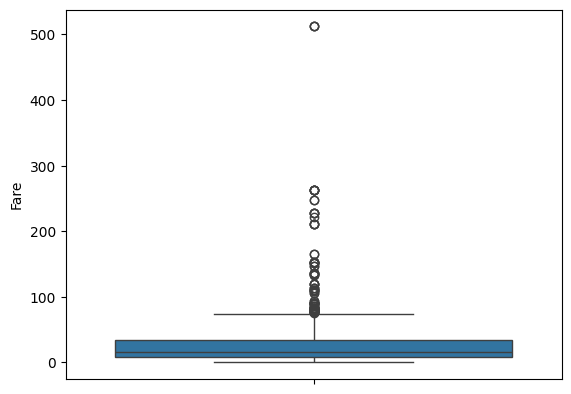

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y = df['Fare'] )

<Axes: ylabel='Fare'>

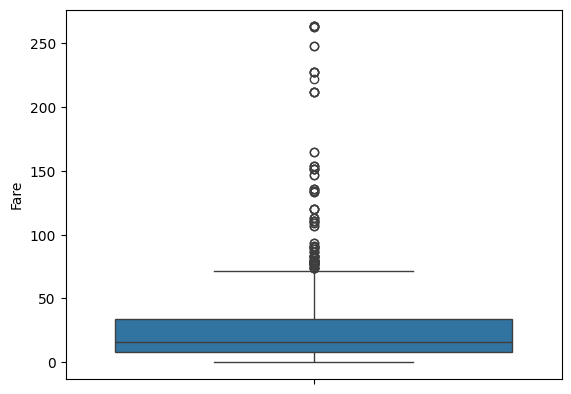

In [ ]:
df.drop(df[df.Fare >= 500].index, inplace = True)
sns.boxplot(y = df['Fare'] )

In [ ]:
df.describe()

,Survived,Pclass,Gender,Age,Sibling.Spouse,Parch,Fare
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,0.410853,2.248062,0.374677,29.798243,0.529716,0.419897,33.082913
std,0.492307,0.852947,0.484352,13.754245,0.990783,0.840850,43.149755
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,0.000000,29.819614,0.000000,0.000000,15.950000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


#### Min-max normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Fare']] = scaler.fit_transform(df[['Fare']])
df.describe()

,Survived,Pclass,Gender,Age,Sibling.Spouse,Parch,Fare
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,0.410853,2.248062,0.374677,29.798243,0.529716,0.419897,0.125791
std,0.492307,0.852947,0.484352,13.754245,0.990783,0.840850,0.164068
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.030608
50%,0.000000,3.000000,0.000000,29.819614,0.000000,0.000000,0.060646
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,0.128862
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000


## Task3

Find dataset on open data portals (Kaggle or others)
  - Perform at least one task from each preprocessing technique
  - Data cleaning
  - Data transformation
  - Data normalization

### Dataset

#### Spambase
- 이메일이 스팸인지 아닌지 구분하는 데이터셋
- kaggle dataset : https://www.kaggle.com/datasets/colormap/spambase

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spambase.csv to spambase.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['spambase.csv'].decode('utf-8')))
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### Data Cleaning

In [ ]:
df.isnull().sum() # 데이터 중 결측값이 하나도 없음

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [ ]:
df.shape # 중복 제거 이전

(4601, 58)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape # 중복제거 이후 4601 -> 4210

(4210, 58)

In [ ]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### Data Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 non-n

In [ ]:
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].round(2) # 소수점 2자리까지 반올림
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.78,0.00,0.00,3.76,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.13,0.0,0.37,0.18,0.05,5.11,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.14,0.0,0.28,0.18,0.01,9.82,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.14,0.0,0.14,0.00,0.00,3.54,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.14,0.0,0.14,0.00,0.00,3.54,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.00,0.23,0.0,0.00,0.00,0.00,1.14,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.35,0.00,0.00,1.56,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.10,0.72,0.0,0.00,0.00,0.00,1.40,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.0,0.00,0.00,0.00,1.15,5,78,0


### Data Normalization

<Axes: ylabel='word_freq_address'>

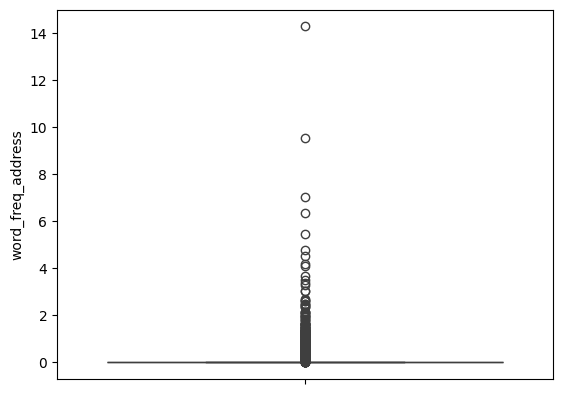

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y = df['word_freq_address'] )

<Axes: ylabel='word_freq_address'>

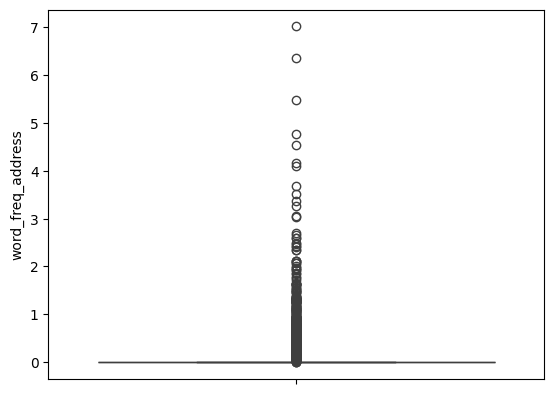

In [ ]:
df.drop(df[df.word_freq_address >= 8].index, inplace = True) # outer detection을 사용하여 정규화
sns.boxplot(y = df['word_freq_address'] )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/bigdata-report-2'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/bigdata-report-2 to PDF
[NbConvertApp] Support files will be in bigdata-report-_files/
[NbConvertApp] Making directory ./bigdata-report-_files
[NbConvertApp] Making directory ./bigdata-report-_files
[NbConvertApp] Making directory ./bigdata-report-_files
[NbConvertApp] Making directory ./bigdata-report-_files
[NbConvertApp] Writing 90430 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 129729 bytes to /content/drive/MyDrive/Colab Notebooks/bigdata-report-.pdf
